# Kaggle ML Zixuan_id1720

## 1. Load Libraries and read dataset 
Here we import some basic data visualiazation library like pandas & numpy to support our following data analysis.

In [1]:
import pandas as pd # data processing
import numpy as np # linear algebra 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Train.csv')

## 2. Preview Dataset

In [3]:
# Check data 
data.head()

X1  X2      X3       X4  X5    X6          X7     X8          X9  X10  \
0   634995   0     463  Source1   0   806   11.291045    1.0   70.495138    0   
1  3995273   0  297147  Source4  43  2007  603.141026  494.5  424.681501    1   
2  3995273   0  297147  Source4  43  2007  603.141026  494.5  424.681501    1   
3  3995273   0  297147  Source4  43  2007  603.141026  494.5  424.681501    1   
4  3995273   0  297147  Source4  43  2007  603.141026  494.5  424.681501    1   

   ...   X30  X31  X32   X33  X34  X35  X36  X37       X38    Y  
0  ...     1    0    1     1   -1  165    2   24    Friday    0  
1  ...   474  143  331   459 -188   14  324   24  Saturday   31  
2  ...  1033  285  748   943 -463   20  153   24    Monday   55  
3  ...  1521  536  985  1437 -449   28  506   24    Friday  161  
4  ...   271    2   50   259  -48   53  105   24  Saturday    3  

[5 rows x 39 columns]

In [4]:
# View Data Distribution of Y
data['Y'].value_counts()

0      1149
1       282
2       133
3        76
4        53
       ... 
75        1
43        1
121       1
131       1
94        1
Name: Y, Length: 96, dtype: int64

We found that the Train.csv contains 38 covariates, while 2 of them (x4 & x38) are not inte, so we would like to modify the format of them.  

In [5]:
# Look at X4
data['X4'].value_counts()

Source9     375
Source24    226
Source18    216
Source36    120
Source16     95
           ... 
Source33      1
Source83      1
Source93      1
Source11      1
Source58      1
Name: X4, Length: 81, dtype: int64

In [6]:
# Modify the value of X4
data['X4'] = data['X4'].map(lambda x: int(x.replace('Source', '')))

In [7]:
# Look at X38
data['X38'].value_counts()

Wednesday    332
Tuesday      318
Monday       314
Thursday     307
Friday       296
Saturday     277
Sunday       247
Name: X38, dtype: int64

In [8]:
# Modify the value of X38
# Change "Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday" to 1,2,3,4,5,6,7
data['X38'] = data['X38'].map(lambda x: int(x.replace('Monday', '1').replace('Tuesday', '2').replace('Wednesday', '3').replace('Thursday', '4').replace('Friday', '5').replace('Saturday', '6').replace('Sunday', '7')))

In [9]:
data.info() # view summary of dataframe after data processing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      2091 non-null   int64  
 1   X2      2091 non-null   int64  
 2   X3      2091 non-null   int64  
 3   X4      2091 non-null   int64  
 4   X5      2091 non-null   int64  
 5   X6      2091 non-null   int64  
 6   X7      2091 non-null   float64
 7   X8      2091 non-null   float64
 8   X9      2091 non-null   float64
 9   X10     2091 non-null   int64  
 10  X11     2091 non-null   int64  
 11  X12     2091 non-null   float64
 12  X13     2091 non-null   float64
 13  X14     2091 non-null   float64
 14  X15     2091 non-null   int64  
 15  X16     2091 non-null   int64  
 16  X17     2091 non-null   float64
 17  X18     2091 non-null   float64
 18  X19     2091 non-null   float64
 19  X20     2091 non-null   int64  
 20  X21     2091 non-null   int64  
 21  X22     2091 non-null   float64
 22  

In [10]:
# Check if there are missing values
data.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
X33    0
X34    0
X35    0
X36    0
X37    0
X38    0
Y      0
dtype: int64

In [11]:
# Draw Feature Hist
def plot_feature_hist(df):
    feature_names = list(data.dtypes[data.dtypes == 'int64'].index) + list(data.dtypes[data.dtypes == 'float64'].index)
    rows, cols = len(feature_names)//3+1, 3
    plt.rcParams['figure.figsize'] = (24, 6*rows)
    df[feature_names].hist(layout=(rows, cols), bins=31)

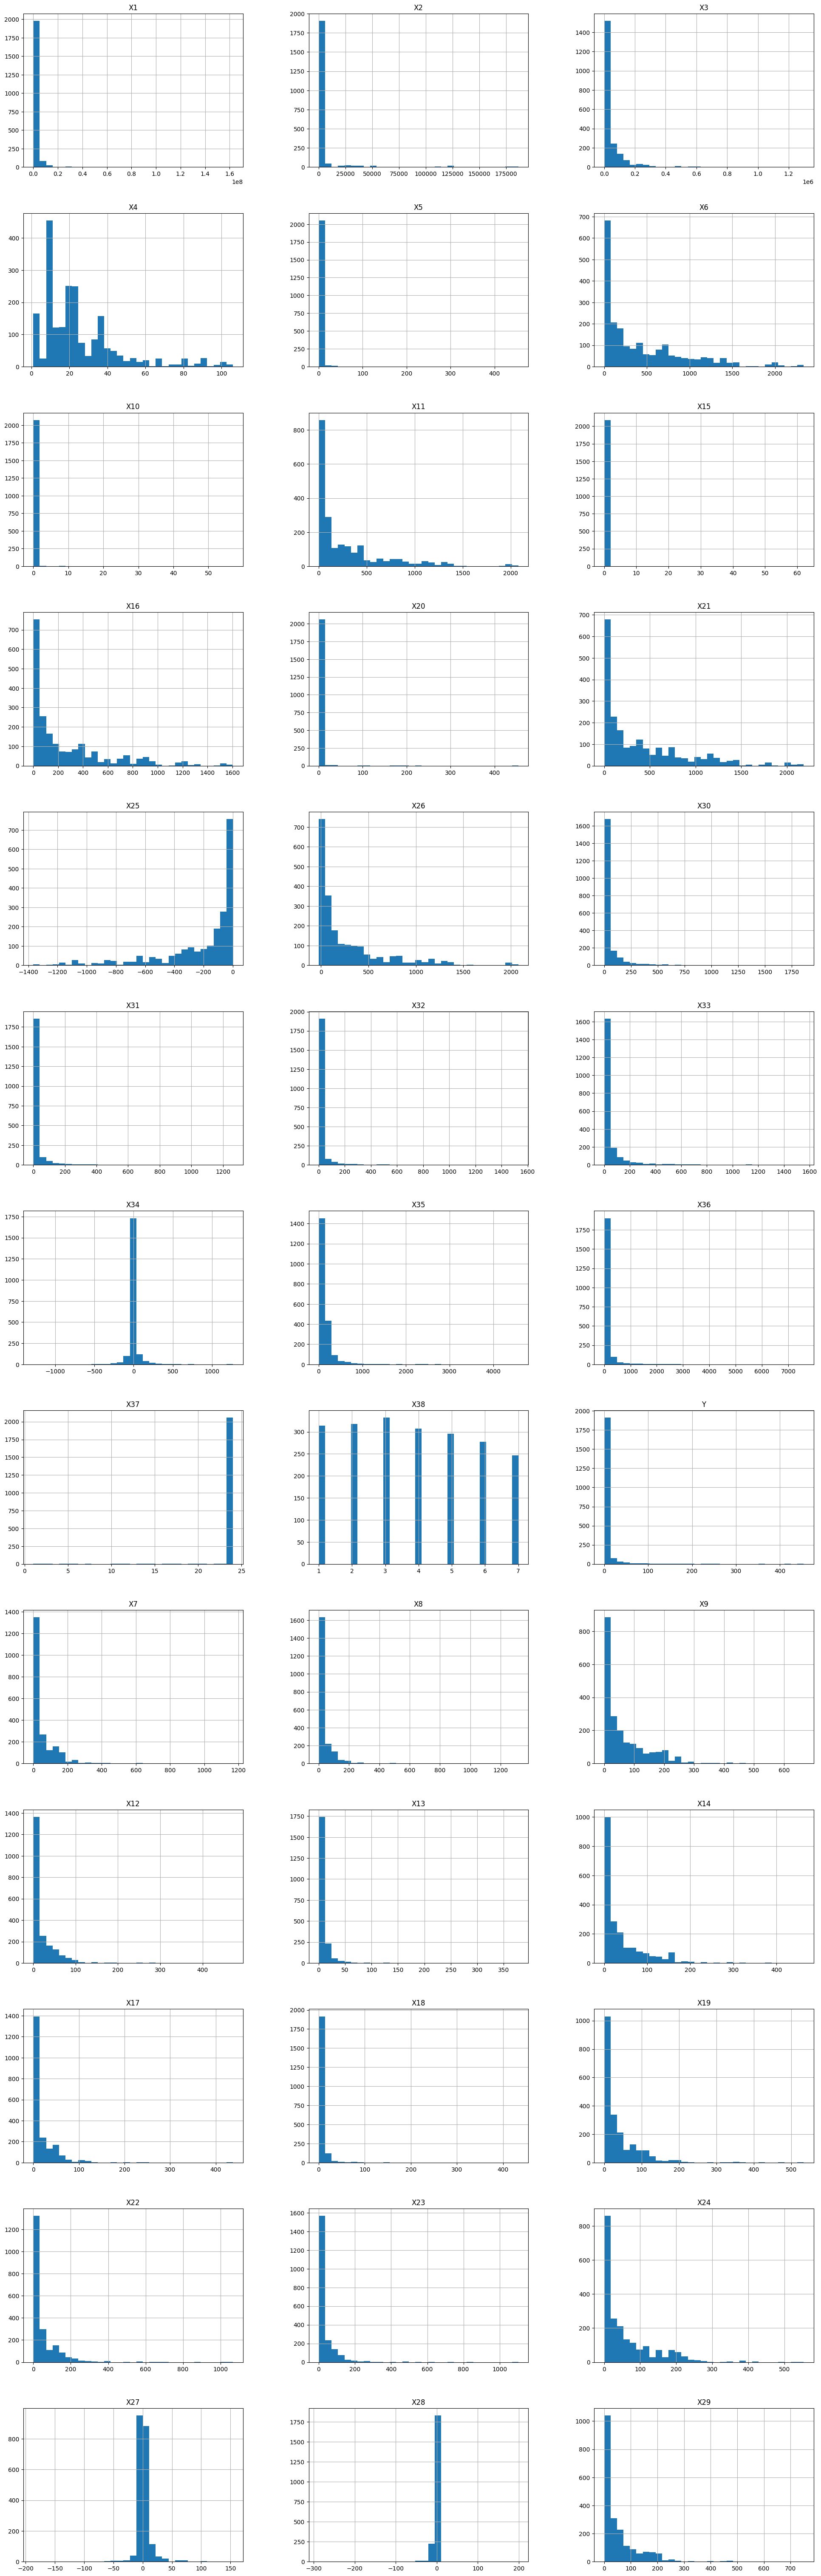

In [12]:
plot_feature_hist(data)

In [13]:
# View Relevance to targeted value
data.corr()['Y'].sort_values(ascending=False)

Y      1.000000
X31    0.654108
X34    0.448705
X33    0.417979
X30    0.401025
X17    0.361100
X7     0.358483
X22    0.357594
X12    0.353986
X19    0.350124
X29    0.348738
X13    0.342666
X9     0.341915
X23    0.339205
X24    0.335817
X8     0.333293
X14    0.318617
X6     0.280632
X21    0.275259
X16    0.260953
X11    0.242977
X36    0.241647
X26    0.240367
X18    0.233711
X3     0.225334
X20    0.189834
X5     0.185688
X10    0.150194
X32    0.117774
X27    0.093098
X1     0.069966
X2     0.041859
X15    0.017893
X38    0.002975
X37    0.000601
X35   -0.033155
X28   -0.065862
X4    -0.087191
X25   -0.248992
Name: Y, dtype: float64

## 3. Model evalution

Then we are in the process to choose a relatively better performing models. After doing some research, I found that Catboost maybe a good method to deal this regression issue here with the train dataset. Comparing to other boost models shown as below, catboost has higher test AUC score and lower parameter turning time. So we choose catboost as our ML method here.

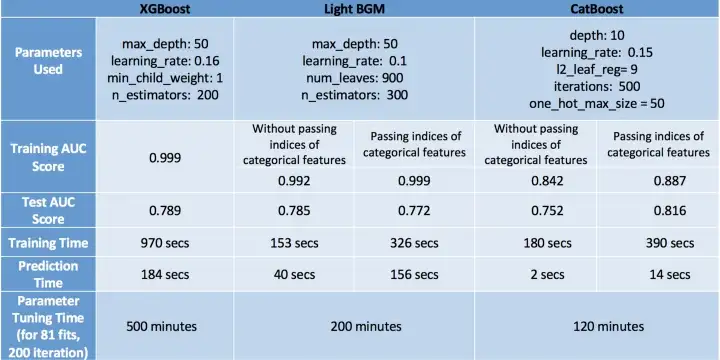

In [14]:
# pca
from sklearn.decomposition import PCA
# catboost regressor
from catboost import CatBoostRegressor
# lr
from sklearn.linear_model import LinearRegression
# rf
from sklearn.ensemble import RandomForestRegressor
# Process
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# MAE
from sklearn.metrics import mean_absolute_error
# MSE
from sklearn.metrics import mean_squared_error

In [15]:
X = data.drop(['Y'], axis=1)
y = data['Y']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# pca 
# 1.Tuning parameters
pca = PCA(n_components=0.95)
pca_X_train = pca.fit_transform(X_train)
pca_X_val = pca.transform(X_val)

# catboost
# 2.Tuning parameters
catboost = CatBoostRegressor(iterations=2000, learning_rate=0.1, depth=6, loss_function='MAE', eval_metric='MAE', random_seed=0, logging_level='Silent')
catboost.fit(pca_X_train, y_train)
y_pred = catboost.predict(pca_X_val)
print('catboost MAE with pca:', mean_absolute_error(y_val, y_pred))
print('catboost MSE with pca:', mean_squared_error(y_val, y_pred))

# catboost without pca
catboost = CatBoostRegressor(iterations=2000, learning_rate=0.1, depth=6, loss_function='MAE', eval_metric='MAE', random_seed=0, logging_level='Silent')
catboost.fit(X_train, y_train)
y_pred = catboost.predict(X_val)
print('catboost MAE without pca:', mean_absolute_error(y_val, y_pred))
print('catboost MSE without pca:', mean_squared_error(y_val, y_pred))

catboost MAE with pca: 4.740146157621812
catboost MSE with pca: 184.07366614867908
catboost MAE without pca: 3.807189964438539
catboost MSE without pca: 130.2104600638725


To confirm that catboost does perform better than other models, we conducted several experiments using other models. Taking the random forest and linear regression here as an exampel, the result shows that catboost without pca does have a better performance (MAE 3.8) than the random forest on the validation set. 

In [17]:
# lr
lr = LinearRegression()
lr.fit(pca_X_train, y_train)
y_pred = lr.predict(pca_X_val)
print('lr MAE with pca:', mean_absolute_error(y_val, y_pred))
print('lr MSE with pca:', mean_squared_error(y_val, y_pred))

# lr without pca
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
print('lr MAE without pca:', mean_absolute_error(y_val, y_pred))
print('lr MSE without pca:', mean_squared_error(y_val, y_pred))

# rf
#rf = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=2022)
#rf.fit(X_train, y_train)
#rf_pred = rf.predict(pca_X_val)
#print('lr MAE with pca:', mean_absolute_error(y_val, rf_pred))
#print('lr MSE with pca:', mean_squared_error(y_val,rf_pred))
# pca_x_val didn't work with rf, as X has 15 features, but RandomForestRegressor is expecting 38 features as input.

# rf without pca
rf = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=2022)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_val)
print('rf MAE without pca:', mean_absolute_error(y_val, rf_pred))
print('rf MSE without pca:', mean_squared_error(y_val, rf_pred))

lr MAE with pca: 4.963860937372209
lr MSE with pca: 150.96530661128108
lr MAE without pca: 7.651815830099196
lr MSE without pca: 1486.639147633838
rf MAE without pca: 3.9486198328501776
rf MSE without pca: 133.35874065867398


## 4. Model Prediction

In [18]:
pred_data = pd.read_csv('TestForStudents.csv')

In [19]:
# pred_data feature processing
pred_data['X4'] = pred_data['X4'].map(lambda x: int(x.replace('Source', '')))
pred_data['X38'] = pred_data['X38'].map(lambda x: int(x.replace('Monday', '1').replace('Tuesday', '2').replace('Wednesday', '3').replace('Thursday', '4').replace('Friday', '5').replace('Saturday', '6').replace('Sunday', '7')))

X_pred = scaler.fit_transform(pred_data)

In [20]:
# Prediction
cat_pred = catboost.predict(X_pred)
cat_around = np.around(cat_pred)
cat_int = cat_around.astype(int)  
# Save the output
pd.DataFrame(cat_int, columns=['Y']).to_csv('ML_id1720.csv', index=False, header=False)

Because the output data in train dataset are integers, so here we use around and astype fonction to convert float data to integers. And the results are saved in cat_id1720 csv file.